In [67]:
#Configuracion inicial
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
def tutorial_graficos_profe(archivo):
    seaborn.set_context(context='talk', font_scale=1.2)

    data = pandas.read_csv(archivo)
    time_gen = data['vectime'].loc[[20]].tolist()
    buffer_gen = data['vecvalue'].loc[[20]].tolist()

    time_queue = data['vectime'].loc[[21]].tolist()
    buffer_queue = data['vecvalue'].loc[[21]].tolist()

    time_sink = data['vectime'].loc[[22]].tolist()
    buffer_sink = data['vecvalue'].loc[[22]].tolist()
    time_gen = list(map(float, (time_gen[0] ).split()))
    time_queue = list(map(float, (time_queue[0] ).split()))
    time_sink = list(map(float, (time_sink[0] ).split()))
    buffer_gen = list(map(float, (buffer_gen[0] ).split()))
    buffer_queue = list(map(float, (buffer_queue[0] ).split()))
    buffer_sink = list(map(float, (buffer_sink[0] ).split()))

    plt.plot(time_gen, buffer_gen, color='tab:blue', label="Tx")
    plt.plot(time_queue, buffer_queue, color='tab:orange', label="Nx")
    plt.plot(time_sink, buffer_sink, color='tab:green', label="Rx")
    plt.title('Ocupacion de buffers en el sistema')
    plt.xlabel("tiempo de simulacion")
    plt.ylabel("Cantidad de paquetes en el buffer")
    plt.legend()
    plt.show()

    fig, ax = plt.subplots(3)
    fig.suptitle('Ocupacion de buffers en el sistema')
    ax[0].plot(time_gen, buffer_gen, color='tab:blue', label="Tx")
    ax[1].plot(time_queue, buffer_queue, color='tab:orange', label="Nx")
    ax[2].plot(time_sink, buffer_sink, color='tab:green', label="Rx")
    plt.title('')
    plt.xlabel("tiempo de simulacion")
    plt.ylabel("Cantidad de paquetes en el buffer")
    plt.legend()
    plt.show()

    #Agregue en el modelo un contador de paquetes generados y paquetes consumidos
    #sacando la info
    time_gen = data['vectime'].loc[[19]].tolist()
    packets_gen = data['vecvalue'].loc[[19]].tolist()
    time_sink = data['vectime'].loc[[24]].tolist()
    packets_sink = data['vecvalue'].loc[[24]].tolist()

    #dividiendo en listas
    time_gen = list(map(float, time_gen[0] .split()))
    packets_sink = list(map(float, packets_sink[0] .split()))
    time_sink = list(map(float, time_sink[0] .split()))
    packets_gen = list(map(float, packets_gen[0] .split()))

    plt.figure(figsize=(10, 6))
    seaborn.barplot(
        x=['Enviados', 'Recibidos'],
        y=[len(packets_gen), len(packets_sink)])
    print(len(packets_gen))
    print(len(packets_sink))



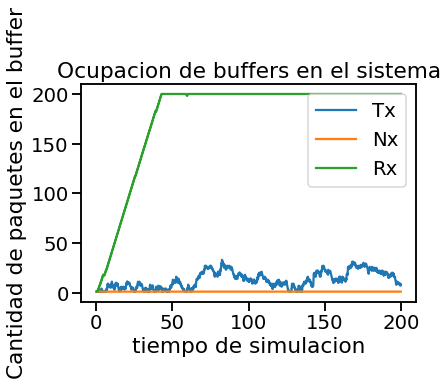

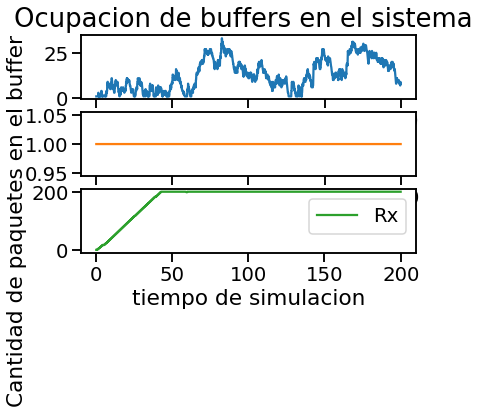

1979
998


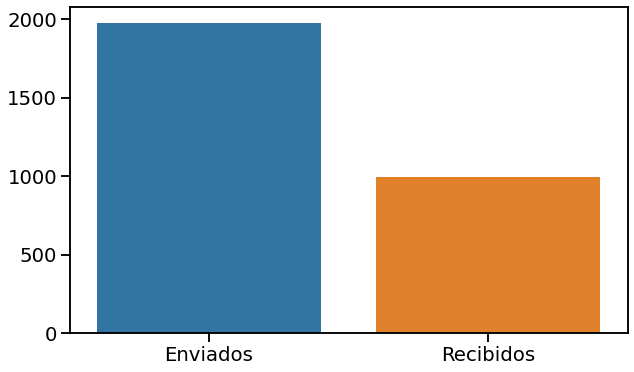

In [68]:
tutorial_graficos_profe('data/case1/lab3_1.0_excel.csv')

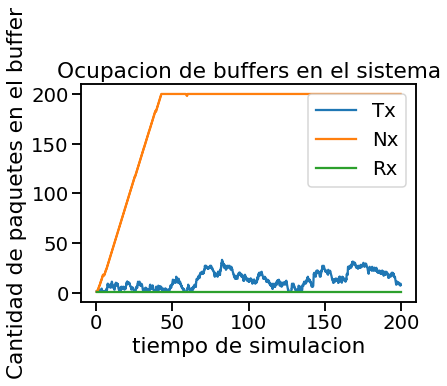

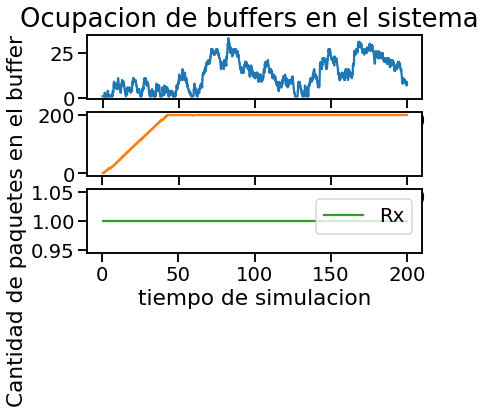

1979
998


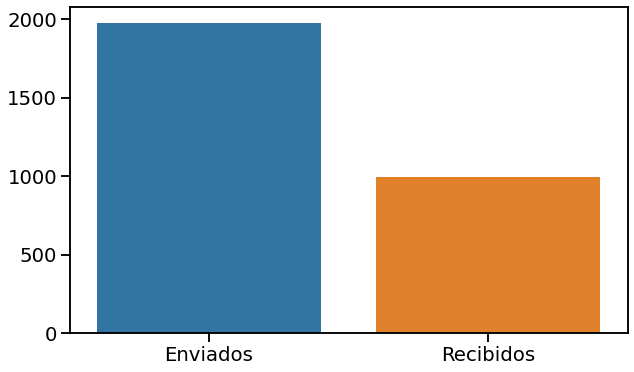

In [69]:
tutorial_graficos_profe('data/case2/lab3_2.0_excel.csv')
